# Deep Learning with Keras: Fashion MNIST dataset

In [1]:
from keras.datasets import fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

C:\Users\scorde\AppData\Local\Continuum\anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [ ]:
from keras.utils import to_categorical
y_train = to_categorical(y_train)
#y_test = to_categorical(y_test)

In [2]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


We have a data set composed by 70 000 images of clothes from Zalando:
- 60 000 images in the training set
- 10 000 images in the testing set

Each image is formed by 28x28=784 pixels encoded in greyscale (0-255). starting from zero (white), the higher the number, the darker is the pixel.

Pictures are dirtibuted across 10 different classes:
- 0 T-shirt/top
- 1 Trouser
- 2 Pullover
- 3 Dress
- 4 Coat
- 5 Sandal
- 6 Shirt
- 7 Sneaker
- 8 Bag
- 9 Ankle boot 

In [3]:
print(type(x_train))

<class 'numpy.ndarray'>


In [4]:
print(x_train[1, :, :])

[[  0   0   0   0   0   1   0   0   0   0  41 188 103  54  48  43  87 168
  133  16   0   0   0   0   0   0   0   0]
 [  0   0   0   1   0   0   0  49 136 219 216 228 236 255 255 255 255 217
  215 254 231 160  45   0   0   0   0   0]
 [  0   0   0   0   0  14 176 222 224 212 203 198 196 200 215 204 202 201
  201 201 209 218 224 164   0   0   0   0]
 [  0   0   0   0   0 188 219 200 198 202 198 199 199 201 196 198 198 200
  200 200 200 201 200 225  41   0   0   0]
 [  0   0   0   0  51 219 199 203 203 212 238 248 250 245 249 246 247 252
  248 235 207 203 203 222 140   0   0   0]
 [  0   0   0   0 116 226 206 204 207 204 101  75  47  73  48  50  45  51
   63 113 222 202 206 220 224   0   0   0]
 [  0   0   0   0 200 222 209 203 215 200   0  70  98   0 103  59  68  71
   49   0 219 206 214 210 250  38   0   0]
 [  0   0   0   0 247 218 212 210 215 214   0 254 243 139 255 174 251 255
  205   0 215 217 214 208 220  95   0   0]
 [  0   0   0  45 226 214 214 215 224 205   0  42  35  60  16  1

In [5]:
import matplotlib.pyplot as plt
plt.imshow(x_train[1000], cmap=plt.cm.gray_r)
plt.show()

<Figure size 640x480 with 1 Axes>

On voit ici l'image d'un pantalon.

In [6]:
print(y_train[1000])

1


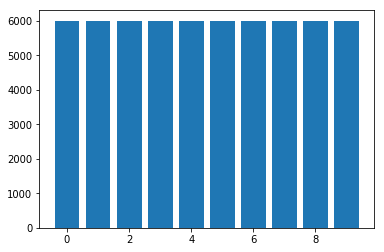

In [7]:
import numpy as np

plt.bar(np.unique(y_train), np.bincount(y_train))
plt.show()

In [8]:
np.bincount(y_train)

array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000],
      dtype=int64)

Each cloth appears 6 000 in the training set.

## Muli Layer Perceptron (MLP) 

### a) Import of libraries 

In [59]:
from keras.layers import Flatten, Dense, Conv2D, MaxPooling2D
from keras.activations import relu, sigmoid, softmax
from keras.models import Sequential
from keras.optimizers import SGD, Adam
from keras.initializers import glorot_uniform
import numpy as np

### b) Construction of the model

In [60]:
#np.random.seed(100) #==> 87% accuracy
#np.random.seed(10) # ==> 57% accuracy
mlp_clothes=Sequential()

mlp_clothes.add(Flatten())
mlp_clothes.add(Dense(units=100, activation=relu, kernel_initializer=glorot_uniform(seed=123)))
mlp_clothes.add(Dense(units=50, activation=relu, kernel_initializer=glorot_uniform(seed=123)))
mlp_clothes.add(Dense(units=20, activation=relu, kernel_initializer=glorot_uniform(seed=123)))

mlp_clothes.add(Dense(units=10, activation=softmax))

### c) Compilation of the model 

In [61]:
mlp_clothes.compile(optimizer='adam',  # Good default optimizer to start with
                    loss='sparse_categorical_crossentropy',  # how we will calculate our "error." Neural network aims to minimize loss.
                    metrics=['accuracy'])  # what to track

### d) Fitting of the model

In [62]:
mlp_clothes.fit(x_train, y_train, batch_size = 256, epochs=10)

Epoch 1/10
60000/60000 [==============================] - 2s 32us/step - loss: 4.6304 - acc: 0.6811
Epoch 2/10
60000/60000 [==============================] - 1s 24us/step - loss: 3.9323 - acc: 0.7193
Epoch 3/10
60000/60000 [==============================] - 1s 21us/step - loss: 0.9777 - acc: 0.7395
Epoch 4/10
60000/60000 [==============================] - 1s 20us/step - loss: 0.5879 - acc: 0.7955
Epoch 5/10
60000/60000 [==============================] - 1s 21us/step - loss: 0.5142 - acc: 0.8200
Epoch 6/10
60000/60000 [==============================] - 1s 21us/step - loss: 0.4567 - acc: 0.8428
Epoch 7/10
60000/60000 [==============================] - 1s 21us/step - loss: 0.4235 - acc: 0.8541
Epoch 8/10
60000/60000 [==============================] - 1s 24us/step - loss: 0.4017 - acc: 0.8601
Epoch 9/10
60000/60000 [==============================] - 1s 23us/step - loss: 0.3866 - acc: 0.8650
Epoch 10/10
60000/60000 [==============================] - 1s 23us/step - loss: 0.3737 - acc: 0.8678

### e) Predictions on the test set

In [63]:
predictions = mlp_clothes.predict_classes(x_test)

In [64]:
predictions.shape

(10000,)

In [65]:
predictions.sum()

45760

In [66]:
predictions

array([9, 2, 1, ..., 8, 1, 5], dtype=int64)

## Predictive Performance

In [67]:
from sklearn.metrics import accuracy_score

metric = accuracy_score(y_test, predictions)
print(metric)

0.8486


### Feature scaling

In [68]:
x_train_scaled = x_train / 255
x_test_scaled = x_test / 255

In [69]:
print(x_train.min())
print(x_train.max())

0
255


In [70]:
print(x_train_scaled.min())
print(x_train_scaled.max())

0.0
1.0


In [71]:
mlp_clothes.fit(x_train_scaled, y_train, batch_size = 256, epochs=10)

Epoch 1/10
60000/60000 [==============================] - 2s 32us/step - loss: 1.1091 - acc: 0.5955
Epoch 2/10
60000/60000 [==============================] - 2s 32us/step - loss: 0.4700 - acc: 0.8318
Epoch 3/10
60000/60000 [==============================] - 2s 38us/step - loss: 0.4025 - acc: 0.8560
Epoch 4/10
60000/60000 [==============================] - 2s 38us/step - loss: 0.3711 - acc: 0.8662
Epoch 5/10
60000/60000 [==============================] - 2s 31us/step - loss: 0.3482 - acc: 0.8746
Epoch 6/10
60000/60000 [==============================] - 2s 33us/step - loss: 0.3329 - acc: 0.8787
Epoch 7/10
60000/60000 [==============================] - 2s 36us/step - loss: 0.3209 - acc: 0.8836
Epoch 8/10
60000/60000 [==============================] - 2s 33us/step - loss: 0.3084 - acc: 0.8869
Epoch 9/10
60000/60000 [==============================] - 2s 34us/step - loss: 0.2969 - acc: 0.8913
Epoch 10/10
60000/60000 [==============================] - 2s 31us/step - loss: 0.2915 - acc: 0.8932

In [72]:
predictions_scaled = mlp_clothes.predict_classes(x_test_scaled)

In [73]:
from sklearn.metrics import accuracy_score

metric_scaled = accuracy_score(y_test, predictions_scaled)
print(metric_scaled)

0.8754


## Model saving

### We save the model structure in the yaml format (layers, activation functions, dimensions, ...)

In [79]:
from keras.models import model_from_yaml

### On sauve la strcture du modèle (couches, fonctions d'activations, dimensions, ...)
model_yaml = mlp_clothes.to_yaml()
with open("mlp_clothes.yaml", "w") as yaml_file:
    yaml_file.write(model_yaml)

### We save the set of weights of the model in the h5 format

In [80]:
### We save the 84 600 weights
mlp_clothes.save_weights("mlp_clothes.h5")
print("Saved model to disk")

Saved model to disk


## Loading of the model

In [ ]:
yaml_file = open('mlp_clothes.yaml', 'r')
loaded_model_yaml = yaml_file.read()
yaml_file.close()
loaded_model = model_from_yaml(loaded_model_yaml)
# load weights into new model
loaded_model.load_weights("mlp_clothes.h5")
print("Loaded model from disk")

In [ ]:
loaded_model.weights

In [ ]:
loaded_model.summary()

In [ ]:
for layer in mlp_clothes.layers:
    g=layer.get_config()
    h=layer.get_weights()
    print (g)
    print (h)

In [ ]:
import numpy
len(numpy.unique(y_train))